In [36]:
import clean_data
import feature_selection as fs
import modeling_2 as model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
df = clean_data.runAll()

/Users/williamegan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [38]:
df

,ADM_RATE,AGEGE24,AGE_ENTRY,AVGFACSAL,COSTT4_A,COSTT4_P,D150_4_AIANOLD,D150_4_HISPOLD,D150_L4_AIANOLD,D150_L4_HISPOLD,...,ICLEVEL_2.0,ICLEVEL_3.0,OPENADMP_0.0,OPENADMP_1.0,OPENADMP_2.0,OPENADMP_3.0,OPEFLAG_0.0,Year,MD_EARN_WNE_P6,UNITID
0,-1.639374e+00,-2.428936e+00,-1.110862,-0.639116,0.000000,-1.404984e-15,-5.248629e-01,-6.301681e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.254144,100654
1,9.608269e-01,-1.122806e+00,-0.618704,0.330194,0.000000,-1.404984e-15,1.629829e-01,-5.788934e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.442901,100663
2,1.472615e+00,-1.029511e+00,-0.471110,0.064926,0.000000,-1.404984e-15,-6.629900e-02,-5.994033e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.529426,100706
3,-1.215900e+00,-2.615526e+00,-1.171066,-0.624657,0.000000,-1.404984e-15,-6.395038e-01,-6.404230e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.085809,100724
4,1.410360e+00,-2.522231e+00,-1.114716,0.228425,0.000000,-1.404984e-15,2.226520e+00,-4.455794e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.491274,100751
5,1.285881e-14,6.497997e-01,0.238077,-1.081228,0.000000,-1.404984e-15,-1.018216e-16,1.457312e-16,-0.521445,-0.913625,...,1,0,0,1,0,0,1,2003,10.051908,100760
6,1.285881e-14,1.676045e+00,1.123853,0.009315,0.000000,-1.404984e-15,-1.018216e-16,1.457312e-16,0.000000,0.000000,...,0,0,0,0,0,1,1,2003,10.494048,100812
7,2.313047e+00,-8.429208e-01,-0.426630,-0.240381,0.000000,-1.404984e-15,-5.248629e-01,-6.096582e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.302264,100830
8,7.516237e-01,-2.988707e+00,-1.340666,0.562094,0.000000,-1.404984e-15,1.424034e+00,-4.865991e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.589106,100858
9,1.542108e+00,-3.361887e+00,-1.576697,-0.016266,0.000000,-1.404984e-15,-4.102219e-01,-6.404230e-01,0.000000,0.000000,...,0,0,0,0,1,0,1,2003,10.571317,100937


In [39]:
target = 'MD_EARN_WNE_P6'
df_no_id = df.drop('UNITID', axis=1)

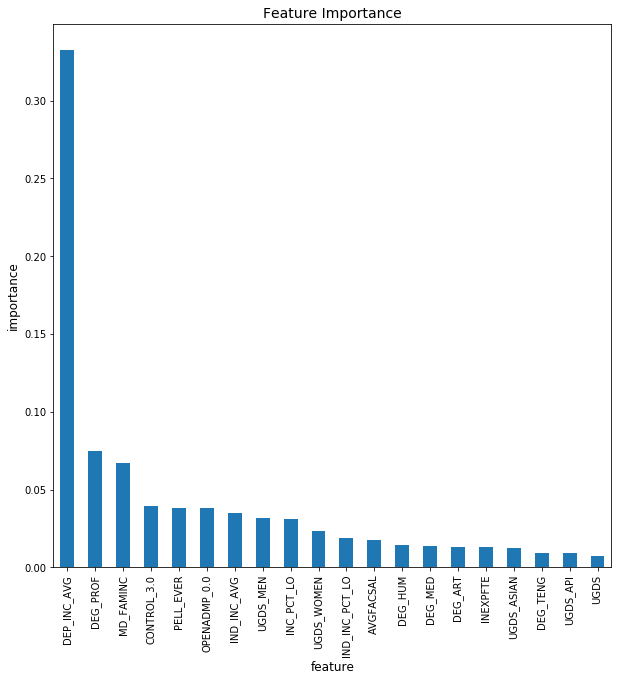

In [40]:
train, test = model.sampling_data(df_no_id)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

est = 20
sel = model.RF

naive_rf_feature_importance, naive_rf, naive_rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

imp_features = model.graph_feature_importance(naive_rf_feature_importance, x_train)

In [41]:
naive_feats = ['DEP_INC_AVG',
 'DEG_PROF',
 'MD_FAMINC',
 'CONTROL_3.0',
 'PELL_EVER',
 'OPENADMP_0.0',
 'IND_INC_AVG',
 'UGDS_MEN',
 'UGDS_WOMEN',
 'IND_INC_PCT_LO',
 'AVGFACSAL',
 'DEG_HUM',
 'INEXPFTE',
 'INC_PCT_LO',
 'DEG_ART',
 'UGDS_ASIAN',
 'DEG_MED',
 'UGDS_API',
 'UGDS',
 'DEG_TENG',
 'Year',
 'MD_EARN_WNE_P6']
n_df = df_no_id[naive_feats]

In [42]:
train, test = model.sampling_data(n_df)
x_train, y_train, x_test, y_test = model.split_data(train, test, target)

est = 20
sel = model.RF

naive_rf_feature_importance, naive_rf, naive_rf_preds = model.run_model(x_train, y_train, x_test, est, sel)

In [43]:
mean_squared_error(y_test, naive_rf_preds)

0.0020192049204413

In [47]:
import numpy as np
mean_absolute_error(np.exp(y_test), np.exp(naive_rf_preds))

887.4785546649709

In [48]:
mean_absolute_error(complete['TEST_MD_EARN_WNE_P6'].apply(lambda x: np.exp(x)), \
                                complete['PRED_MD_EARN_WNE_P6'].apply(lambda x: np.exp(x)))

NameError: name 'complete' is not defined